<a href="https://colab.research.google.com/github/seongheechoi/education/blob/main/1_MP%2C_MDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OutLine

1.   Student MP 구현

> *   state, state_transition probability 구현
*   Markov Process 구현

2.   Markov Property 확인

3. Student MDP 구현


> *   Action
*   Reward
* transition probability
* MDP

4. 정책 평가


> *  Value Iteration
*   Piolicy Iteration
>> *   policy function
>> *   Policy evaluation
>> *   policy improvement

















#Student Markov Process 구현

Markov Process는 상태와 상태 전이 확률로 이루어진 환경에서, 처음 시작한 state로 부터 에피소드가 끝날 때 까지 상태 전이 확률을 따라 진행.
<br>

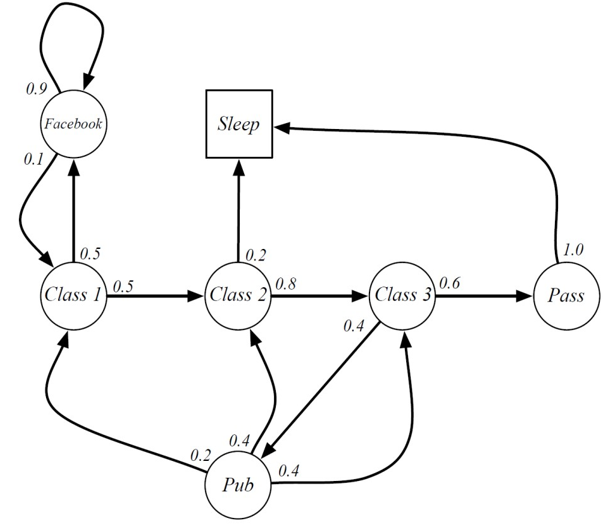

## state, state transition probability 구현
Student MP에선 상태(state),상태 전이 확률(state-transition probability)로 구성된 환경의 에피소드를 확인

In [ ]:
import random
from bisect import bisect

#상태 전이 확률을 정의.
#각 state와, state에서 전이 가능한 state, 전이할 확률을 순서대로 정의

transition_matrix = {
    'facebook': {     #state facebook은 다음에 90% 확률로 facebook, 10%의 확률로 class 1으로 이동
        'facebook': 0.9,
        'class 1': 0.1
    },
    'class 1': {      #state class 1은 다음에 50% 확률로 facebook, 50%의 확률로 class 2로 이동
        'facebook': 0.5,
        'class 2': 0.5
    },
    'class 2': {       #state class 2은 다음에 20% 확률로 sleep, 80%의 확률로 class 3으로 이동
        'sleep': 0.2,
        'class 3': 0.8
    },
    'class 3': {      #state class 3은 다음에 40% 확률로 pub, 60%의 확률로 pass로 이동
        'pub': 0.4,
        'pass': 0.6
    },
    'pub': {          #state pub은 다음에 20%확률로 class 1, 40%확률로 class2, 40%확률로 class 3으로 이동
        'class 1': 0.2,
        'class 2': 0.4,
        'class 3': 0.4,
    },
    'pass': {         # pass state는 반드시 sleep 1으로 이동
        'sleep': 1
    },
    # done = sleep
    'sleep': {'sleep': 1}   #sleep은 sleep state만으로 이동하며, terminal state
}

# 정의한 모든 상태 확인
states = set(transition_matrix.keys())

print("State :", states)

State : {'class 2', 'pub', 'sleep', 'class 3', 'class 1', 'pass', 'facebook'}


stochastic_choice는현 상태로부터 전이 가능한 상태와 확률을 입력받아  다음 상태를 선택하는 함수

In [ ]:
def stochastic_choice(choices):

    print("입력 데이터:", choices)
    values, probs = zip(*choices)   #입력받은 choice에서 상태와 확률을 분리
    print("전이 가능한 상태:", values)
    print("전이 확률:",probs)

    total = 0
    cum_probs = []
    for p in probs:
        total += p
        cum_probs.append(total)
    x = random.random() * total   #0~1 사이의 임의의 수 선택. 최종 크기는 전체 확률의 합과 동일
    i = bisect(cum_probs, x)      #누적 확률 분포에서 임의로 뽑힌 확률을 통해 다음 상태 결정

    print("전체 확률 합:", total)
    print("누적 확률 분포:", cum_probs)
    print("선택된 랜덤 변수:", x)
    print("다음 상태의 인덱스:", i)

    return values[i]

##Markov_Process

Markov_Process는 초기 상태로부터, 에피소드가 끝날 때 까지 상태와 상태 전이 확률을 통해 에피소드를 진행

In [ ]:
def Markov_process(state):

    while state != 'sleep':                       #에피소드가 끝날 때 까지 반복
        print("현재 상태: {}".format(state))  # 현재 state를 출력

        next_state_prob = transition_matrix[state]  #현재 상태에서 전이 가능한 state와 확률을 가져옴
        print(next_state_prob)
        next_state = stochastic_choice(next_state_prob.items()) #상태 전이 확률 정보를 통해 다음 state 결정
        print("다음 상태: ", end='');print(next_state)         #선택된 다음 상태 출력

        state = next_state                         #다음 상태를 현재 상태로 입력하고, 반복
        print()

    print("Agent go to sleeep. Episode Done!")

print("="*100)
print("Possible states")
print(states)
print("="*100)

Possible states
{'class 2', 'pub', 'sleep', 'class 3', 'class 1', 'pass', 'facebook'}


In [ ]:
Markov_process('class 1')

현재 상태: class 1
{'facebook': 0.5, 'class 2': 0.5}
입력 데이터: dict_items([('facebook', 0.5), ('class 2', 0.5)])
전이 가능한 상태: ('facebook', 'class 2')
전이 확률: (0.5, 0.5)
전체 확률 합: 1.0
누적 확률 분포: [0.5, 1.0]
선택된 랜덤 변수: 0.9991959817600821
다음 상태의 인덱스: 1
다음 상태: class 2

현재 상태: class 2
{'sleep': 0.2, 'class 3': 0.8}
입력 데이터: dict_items([('sleep', 0.2), ('class 3', 0.8)])
전이 가능한 상태: ('sleep', 'class 3')
전이 확률: (0.2, 0.8)
전체 확률 합: 1.0
누적 확률 분포: [0.2, 1.0]
선택된 랜덤 변수: 0.027203025345110654
다음 상태의 인덱스: 0
다음 상태: sleep

Agent go to sleeep. Episode Done!


#Markov Property 확인

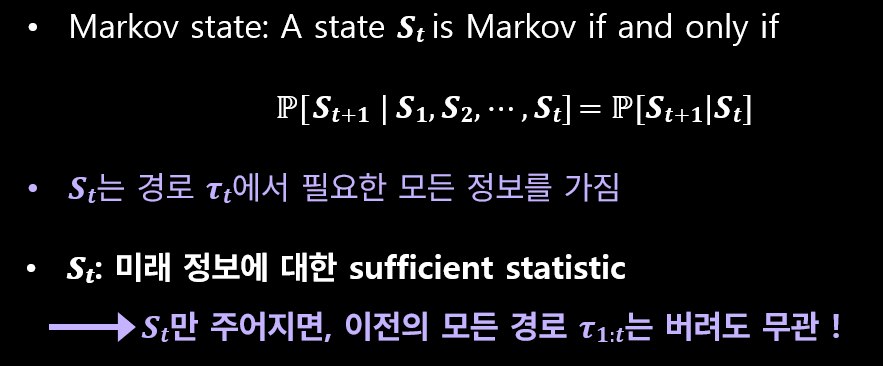

Markov Property를 확인하기 위해서, **class 3에서 시작한 에피소드와 무작위 상태에서 시작한 에피소드를 비교**

In [ ]:
#방문 횟수와, 이 때 시험에 통과한 경우를 따로 카운트.

def check_visit_num(state):
  while(state != 'sleep'):        #에피소드가 끝날 때 까지 반복하며 에피소드 수행
    next_state_prob = transition_matrix[state]
    s_next = stochastic_choice(next_state_prob.items())

    if state == 'class 3':      #class 3에 도착한 경우, 이 때 pass를 선택한 경우와 아닌 경우를 따로 카운트
      if s_next == 'pass':
        return 1,1
      else:
        return 0,1

    state = s_next
  return 0,0

In [ ]:
total = 0
num_pass = 0
num_episode = 100000      #각 파라미터 초기화

#10만개의 에피소드 동안 class 3에 도착한 횟수와 통과한 횟수를 카운트
for i in range(num_episode):
  initial = random.choice(list(states))     # 1. 임의의 경우
  n, m = check_visit_num(initial)
  total += m
  num_pass += n

print("Chance of passing for random initial state: {prob}%"
      .format(prob = num_pass / total * 100))

total = 0
num_pass = 0
for i in range(num_episode):
  n, m = check_visit_num('class 3')        # 2. class 3에서 시작하는 경우
  total += m
  num_pass += n

print("Chance of passing for class 3 initial state: {prob}%"
      .format(prob = num_pass / total * 100))

Chance of passing for random initial state: 59.727213328977456%
Chance of passing for class 3 initial state: 59.724%


**이 때 두 확률이 비슷한 것을 통해, Markov Property를 확인할 수 있음!**

# Student Markov Decision Process

MDP는 상태, 상태전이 확률에 행동과 보상을 추가해, 보상이 최대화 되는 행동을 선택하도록 학습 가능한 환경
<br> 따라서, 행동과 보상에 대한 함수 추가가 필요함

In [ ]:
import random
from bisect import bisect

def stochastic_choice(choices):

    values, probs = zip(*choices)

    total = 0
    cum_probs = []
    for p in probs:
        total += p
        cum_probs.append(total)
    x = random.random() * total
    i = bisect(cum_probs, x)

    return values[i]

## Action

In [ ]:
# 행동은 상태전이확률과 비슷하게 현재 상태에서 수행 가능한 행동으로 표현
actions = {
    'facebook': ['continue', 'go to class'],
    'class 1': ['checkout facebook', 'study'],
    'class 2': ['sleep', 'study'],
    'class 3': ['go to the pub', 'study'],
    'pub': ["return to study"],
    'sleep': ['sleep'],
}
states = set(actions.keys())  #state를 다시 정의

## Reward

In [ ]:
# 보상 또한 행동과 비슷하지만, 각 행동을 수행했을 때 얻게 되는 보상을 함께 작성
def reward(state, action):
    return {
        'facebook': {'continue': -1, 'go to class': 0},
        'class 1': {'checkout facebook': -1, 'study': -2},
        'class 2': {'sleep': 0, 'study': -2},
        'class 3': {'go to the pub': 1, 'study': 10},
        'pub': {"return to study" : 0},
        'sleep': {'sleep': 0},
    }[state][action]          #이 때, [state][action]을 통해 현재 상태와 행동에 대한 정보를 얻고, 이에 따른 보상을 출력하도록 함

## Transition Probability

In [ ]:


# 상태 전이확률은 이제 행동의 영향을 함께 받기 때문에, 다시 정의할 필요가 있음
def transition_prob(state, action):
    '''transition probabilities given state and action'''
    return {
        'facebook': {
            'continue': {'facebook': 1},
            'go to class': {'class 1': 1}
        },
        'class 1': {
            'checkout facebook': {'facebook': 1},
            'study': {'class 2': 1}
        },
        'class 2': {
            'sleep': {'sleep': 1},
            'study': {'class 3': 1}
        },
        'class 3': {
            'go to the pub': {'pub': 1},
            'study': {'sleep': 1}
        },
        'pub': {
            "return to study" : {
                'class 1': 0.2,
                'class 2': 0.4,
                'class 3': 0.4,
            }
        },
        'sleep': {'sleep': {'sleep': 1}}
    }[state][action]

# 현재 상태에서 임의의 행동을 하는 함수 생성
def random_policy(state, actions):
    '''choice a action at random'''
    return random.choice(actions[state])


## Markov Decision Process

In [ ]:
# 전체적으로 MP와 비슷하지만, 행동(action)을 선택하도록 만드는 정책(policy)과 이에 따른 보상(reward)이 추가됨
def MDP(mdp_tuple, state, policy):
    states, actions, transition_prob, reward = mdp_tuple
    gamma = 0.9       # 보상의 감쇄율을 설정

    total_reward = 0
    k = 0

    while state != 'sleep':
        print("current state: {}".format(state))
        selected_action = policy(state, actions)      # 현재 상태에 따라 행동을 선택하는 정책(policy)에 따라 행동 결정
        print("action: {}".format(selected_action))

        next_state_probs = transition_prob(state, selected_action)    # 현재 상태와 선택된 행동에 따른 전이 확률을 선택
        next_state = (stochastic_choice(next_state_probs.items()))    # 선택된 전이 확률에 따라 다음 상태 결정
        print("next_state:", end='');print(next_state)
        r = reward(state, selected_action)                            # 상태와 행동에 따른 보상 결정
        print("reward: {}".format(r))

        state = next_state
        #total_reward += gamma**k * r
        total_reward += r                                            # 에피소드 동안 얻은 보상을 모두 더함
        k += 1
        print()
    print("total reward: {}".format(total_reward))

In [ ]:
print("="*100)
print("Possible states")
print(states)
print("="*100)

Possible states
{'class 2', 'pub', 'sleep', 'class 3', 'class 1', 'pass', 'facebook'}


In [ ]:
#MDP의 구성요소들을 입력시켜 mdu_tuple 생성
mdp_tuple = (states, actions, transition_prob, reward)

#생성된 MDP tuple을 이용해 시작 상태와 정책을 입력하고 에피소드 수행
MDP(mdp_tuple, 'class 1', random_policy)

current state: class 1
action: checkout facebook
next_state:facebook
reward: -1

current state: facebook
action: go to class
next_state:class 1
reward: 0

current state: class 1
action: checkout facebook
next_state:facebook
reward: -1

current state: facebook
action: continue
next_state:facebook
reward: -1

current state: facebook
action: continue
next_state:facebook
reward: -1

current state: facebook
action: go to class
next_state:class 1
reward: 0

current state: class 1
action: checkout facebook
next_state:facebook
reward: -1

current state: facebook
action: go to class
next_state:class 1
reward: 0

current state: class 1
action: checkout facebook
next_state:facebook
reward: -1

current state: facebook
action: go to class
next_state:class 1
reward: 0

current state: class 1
action: checkout facebook
next_state:facebook
reward: -1

current state: facebook
action: go to class
next_state:class 1
reward: 0

current state: class 1
action: study
next_state:class 2
reward: -2

current sta

# 정책 평가

##Value Iteration

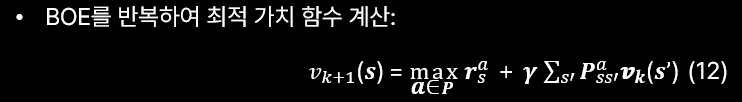

현재 상태에서 얻을 수 있는 최대 가치를 계산하고, 가치를 최대화 하는 행동을 선택하는 최적 정책을 학습

In [ ]:
def value_iteration(mdp_tuple, steps=1):
    states, actions, transition_prob, reward = mdp_tuple    #입력받은 mdp_tuple을 분리하여 정의
    gamma = 0.9

    # state value initialize
    value = {s: 0 for s in states}    #value iteration 시작 전 value값 초기화
    print("Initial value:",  value)
    for i in range(steps):            #설정한 반복 횟수동안 value iteration 진행
        for s, v in value.items():    #모든 상태에 대해 반복
            rewards_in_s = []
            for a in actions[s]:      #현재 선택된 상태에서 수행 가능한 행동에 대한 보상 계산
                r = reward(s, a)
                reward_for_a = r
                for s_bar, p_ss in transition_prob(s, a).items(): #실제 보상에 이전 iteration으로 얻은 가치 함수의 값을 더해줌
                    reward_for_a += gamma * p_ss * value[s_bar]
                rewards_in_s.append(reward_for_a)
            if len(rewards_in_s) > 0:       #만약 가치 값이 존재한다면, 그중 가장 큰 가치 값을 value로 선택
                value[s] = max(rewards_in_s)

        print("Value_Iteration_{}:{}".format(i, value))
        print("="*100)
    return value

mdp_tuple = (states, actions, transition_prob, reward)
value = value_iteration(mdp_tuple, steps=5)

Initial value: {'class 2': 0, 'pub': 0, 'sleep': 0, 'class 3': 0, 'class 1': 0, 'facebook': 0}
Value_Iteration_0:{'class 2': 0.0, 'pub': 0.0, 'sleep': 0.0, 'class 3': 10.0, 'class 1': -1.0, 'facebook': -0.9}
Value_Iteration_1:{'class 2': 7.0, 'pub': 5.940000000000001, 'sleep': 0.0, 'class 3': 10.0, 'class 1': 4.3, 'facebook': 3.87}
Value_Iteration_2:{'class 2': 7.0, 'pub': 6.894000000000001, 'sleep': 0.0, 'class 3': 10.0, 'class 1': 4.3, 'facebook': 3.87}
Value_Iteration_3:{'class 2': 7.0, 'pub': 6.894000000000001, 'sleep': 0.0, 'class 3': 10.0, 'class 1': 4.3, 'facebook': 3.87}
Value_Iteration_4:{'class 2': 7.0, 'pub': 6.894000000000001, 'sleep': 0.0, 'class 3': 10.0, 'class 1': 4.3, 'facebook': 3.87}


100번의 반복을 통해, value function이 어떻게 만들어지는지 확인

In [ ]:
def value_iteration(mdp_tuple, steps=1):
    states, actions, transition_prob, reward = mdp_tuple
    gamma = 0.9


    value = {s: 0 for s in states}
    for i in range(steps):
        for s, v in value.items():
            rewards_in_s = []
            for a in actions[s]:
                r = reward(s, a)
                reward_for_a = r
                for s_bar, p_ss in transition_prob(s, a).items():
                    reward_for_a += gamma * p_ss * value[s_bar]
                rewards_in_s.append(reward_for_a)
            if len(rewards_in_s) > 0:
                value[s] = max(rewards_in_s)
    return value

In [ ]:
mdp_tuple = (states, actions, transition_prob, reward)
value = value_iteration(mdp_tuple, steps=100)
value

{'class 2': 7.0,
 'pub': 6.894000000000001,
 'sleep': 0.0,
 'class 3': 10.0,
 'class 1': 4.3,
 'facebook': 3.87}

Value iteration을 통해 얻은 가치 함수가 최대가 되는 행동을 선택하여 최적 정책(optimal policy) 학습 가능

In [ ]:
def policy_from_value(value, prob, reward):   #학습된 value와 전이 확률, 보상에 대한 정보를 입력받음
    def wrapper(state, actions):
        rewards_action = []
        for action in actions[state]:         # 현재 상태에서 선택 가능한 행동의 가치를 모두 계산
            r_action = 0
            # print(state, action)
            for s, p_ss in prob(state, action).items():
                r_action += p_ss *  (reward(state, action) + value[s])
            rewards_action.append((r_action, action))
        return max(rewards_action)[1]     #현재 상태에서 가장 큰 가치를 가지는 행동을 선택. 결국 최적 행동을 선택하는 최적 정책이 됨
    return wrapper

In [ ]:
MDP(mdp_tuple, 'class 1', policy_from_value(value, transition_prob, reward))

current state: class 1
action: study
next_state:class 2
reward: -2

current state: class 2
action: study
next_state:class 3
reward: -2

current state: class 3
action: study
next_state:sleep
reward: 10

total reward: 6


## Policy Iteration

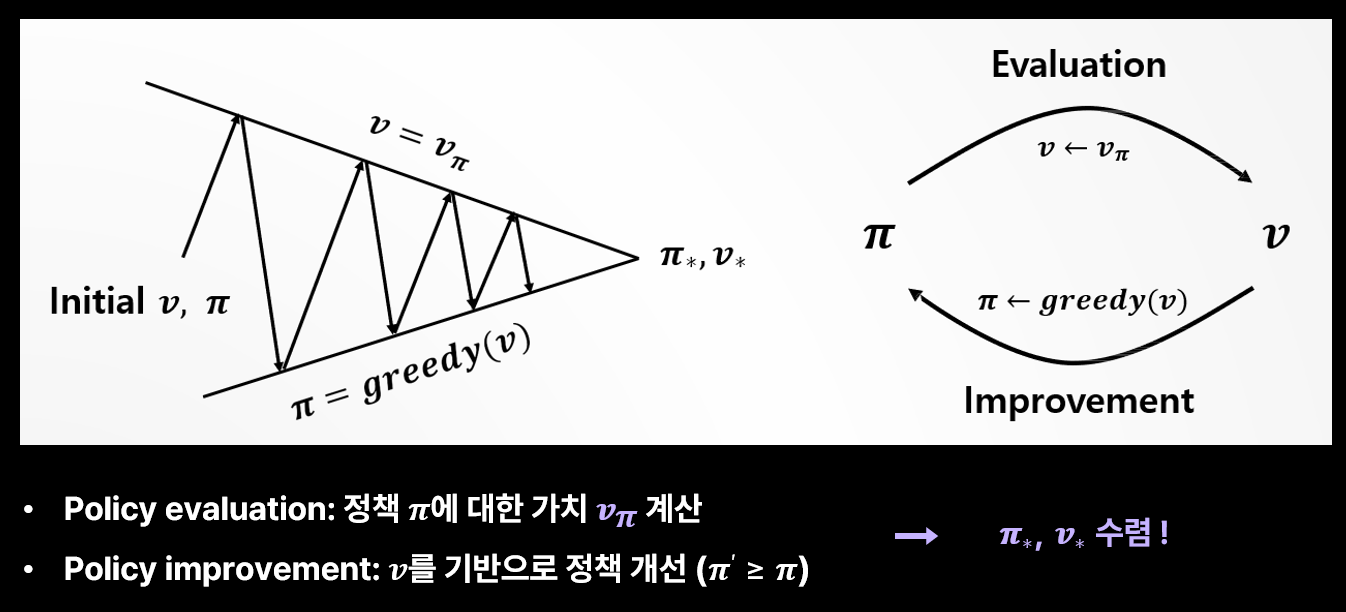

임의의 policy에 대한 가치함수를 evaluation하고, 가치함수를 이용해 policy를 improve하는 방법.
<br>따라서 1.정책평가 -> 2. 정책 업데이트 2단계를 거쳐 최적의 policy를 계산.
<br>
<br> 이 때, 1단계는 Bellman Equation을 이용해 계산하며, Policy Improvement에선 다양한 방법 활용 가능.(Value Iteration의 경우 max 함수)


### policy 함수 정의

In [ ]:
import numpy as np

policy = dict()

#모든 상태, 행동 쌍에 대해서 해당 행동을 선택할 확률을 초기화.
for st in actions.keys():
  policy[st] = list()
  for at in actions[st]:
    policy[st].append(1 / len(actions[st]))
print(policy)
print(actions)


#상태, 행동 쌍과 정책을 모두 받아, 현재 상태에서 정책이 결정하는 행동을 반환하는 함수 작성
def policy2action(state, actions, policy):
  probs = policy[state]

  total = 0
  cum_probs = []

  for p in probs:
      total += p
      cum_probs.append(total)
  x = random.random() * total
  i = bisect(cum_probs, x)

  action = actions[state][i]

  return action

# policy = policy_fn(states, actions)

{'facebook': [0.5, 0.5], 'class 1': [0.5, 0.5], 'class 2': [0.5, 0.5], 'class 3': [0.5, 0.5], 'pub': [1.0], 'sleep': [1.0]}
{'facebook': ['continue', 'go to class'], 'class 1': ['checkout facebook', 'study'], 'class 2': ['sleep', 'study'], 'class 3': ['go to the pub', 'study'], 'pub': ['return to study'], 'sleep': ['sleep']}


###Policy Evaulation

policy evaluation은 value iteration과 비슷하게 업데이트를 진행.
<br>
<br> 단, 하나의 상태에서 모든 행동을 고려하고 계산하는 value iteration과 달리,
<br> **policy evaluation은 policy를 통해 선택된 행동만을 이용하여 value 업데이트를 진행**

In [ ]:
def policy_evaluation(mdp_tuple, policy, steps=100):
    states, actions, transition_prob, reward = mdp_tuple
    gamma = 0.9

    # state value initialize
    value = {s: 0 for s in states}
    print("초기화된 가치 함수:", value)
    for i in range(steps):
        for s, v in value.items():
            rewards_in_s = []

            #state에서 수행 가능한 모든 행동을 고려하는 value iteration과 달리, policy를 통해 하나의 action을 선택
            a = policy2action(s, actions, policy)
            r = reward(s, a)
            reward_for_a = r

            print("상태, 행동, 보상:",s , a , r)

            for s_bar, p_ss in transition_prob(s, a).items():
                reward_for_a += gamma * p_ss * value[s_bar]
            rewards_in_s.append(reward_for_a)

            if len(rewards_in_s) > 0:
                value[s] = max(rewards_in_s)

        print("policy_evaluation_{}:{}".format(i, value))
        print("="*100)
    return value

mdp_tuple = (states, actions, transition_prob, reward)
policy_value = policy_evaluation(mdp_tuple, policy, steps=5)

초기화된 가치 함수: {'class 2': 0, 'pub': 0, 'sleep': 0, 'class 3': 0, 'class 1': 0, 'facebook': 0}
상태, 행동, 보상: class 2 study -2
상태, 행동, 보상: pub return to study 0
상태, 행동, 보상: sleep sleep 0
상태, 행동, 보상: class 3 study 10
상태, 행동, 보상: class 1 study -2
상태, 행동, 보상: facebook go to class 0
policy_evaluation_0:{'class 2': -2.0, 'pub': -0.7200000000000001, 'sleep': 0.0, 'class 3': 10.0, 'class 1': -3.8, 'facebook': -3.42}
상태, 행동, 보상: class 2 study -2
상태, 행동, 보상: pub return to study 0
상태, 행동, 보상: sleep sleep 0
상태, 행동, 보상: class 3 go to the pub 1
상태, 행동, 보상: class 1 checkout facebook -1
상태, 행동, 보상: facebook go to class 0
policy_evaluation_1:{'class 2': 7.0, 'pub': 5.436000000000001, 'sleep': 0.0, 'class 3': 5.892400000000001, 'class 1': -4.077999999999999, 'facebook': -3.6701999999999995}
상태, 행동, 보상: class 2 study -2
상태, 행동, 보상: pub return to study 0
상태, 행동, 보상: sleep sleep 0
상태, 행동, 보상: class 3 go to the pub 1
상태, 행동, 보상: class 1 study -2
상태, 행동, 보상: facebook continue -1
policy_evaluation_2:{'class 2': 3.

100번의 학습 진행 후 결과 확인

In [ ]:
def policy_evaluation(mdp_tuple, policy, steps=100):
    states, actions, transition_prob, reward = mdp_tuple
    gamma = 0.9

    # state value initialize
    value = {s: 0 for s in states}
    for i in range(steps):
        for s, v in value.items():
            rewards_in_s = []

            #state에서 수행 가능한 모든 행동을 고려하는 value iteration과 달리, policy를 통해 하나의 action을 선택
            a = policy2action(s, actions, policy)
            r = reward(s, a)
            reward_for_a = r

            for s_bar, p_ss in transition_prob(s, a).items():
                reward_for_a += gamma * p_ss * value[s_bar]
            rewards_in_s.append(reward_for_a)

            if len(rewards_in_s) > 0:
                value[s] = max(rewards_in_s)
    return value

mdp_tuple = (states, actions, transition_prob, reward)
policy_value = policy_evaluation(mdp_tuple, policy, steps=100)
policy_value

{'class 2': 0.0,
 'pub': 2.2857177528432007,
 'sleep': 0.0,
 'class 3': 10.0,
 'class 1': -2.0,
 'facebook': -1.8099037}

###Policy Improvement

Policy evaluation을 통해 업데이트 된 가치 함수를 이용해, 가치 함수를 최대화 하는 행동을 선택하도록 policy 업데이트

In [ ]:
def policy_improvement(mdp_tuple, policy, policy_value, step = 1):
    states, actions, transition_prob, reward = mdp_tuple
    gamma = 0.7     # 감쇄율은 0.7로 설정

    for i in range(step):
      for s, v in policy_value.items():
        max_action = str()
        max_idx = 0
        max_value = -10000000000              # 선택 전 행동 및 가치 함수와, 해당 상태의 index 정보 초기화.

        for idx, a in enumerate(actions[s]):  # 현재 상태에서 선택 가능한 모든 행동들에 대해 보상과 가치함수 계산
          r = reward(s, a)

          for s_bar, p_ss in transition_prob(s,a).items():
              val = r + gamma * p_ss * policy_value[s_bar]

          if val >= max_value:                 # 만약 계산된 가치 함수가 현재 최대 가치보다 높다면, 이 때 행동과 index를 저장
            max_action = a
            max_idx = idx


        policy[s][max_idx] += 10        # 가장 가치함수가 높았던 행동이 선택될 확률을 증가(Improvement)
        # policy.policy[s][max_idx] += 10        #

    return policy

다섯 번의 업데이트가 진행된 이후 policy 확인

In [ ]:
mdp_tuple = (states, actions, transition_prob, reward)
policy = policy_improvement(mdp_tuple, policy, policy_value, step = 5)
print(policy)

{'facebook': [0.5, 10070.5], 'class 1': [0.5, 10070.5], 'class 2': [0.5, 10070.5], 'class 3': [0.5, 10070.5], 'pub': [10071.0], 'sleep': [10071.0]}


In [ ]:
#policy improvement에서 사용하기 위해 action 선택 방법을 변경
def MDP(mdp_tuple, state, policy):
    states, actions, transition_prob, reward = mdp_tuple
    gamma = 0.9       # 보상의 감쇄율을 설정

    total_reward = 0
    k = 0

    while state != 'sleep':
        print("current state: {}".format(state))
        selected_action = policy2action(state, actions, policy)      # 현재 policy에 따라 action 선택
        print("action: {}".format(selected_action))

        next_state_probs = transition_prob(state, selected_action)
        next_state = (stochastic_choice(next_state_probs.items()))
        print("next_state:", end='');print(next_state)
        r = reward(state, selected_action)
        print("reward: {}".format(r))

        state = next_state
        #total_reward += gamma**k * r
        total_reward += r
        k += 1
        print()
    print("total reward: {}".format(total_reward))

In [ ]:
mdp_tuple = (states, actions, transition_prob, reward)
MDP(mdp_tuple, 'class 1', policy)
# MDP(mdp_tuple, 'class 1', policy.policy2action)

current state: class 1
action: study
next_state:class 2
reward: -2

current state: class 2
action: study
next_state:class 3
reward: -2

current state: class 3
action: study
next_state:sleep
reward: 10

total reward: 6


**100번의 evaluation, improvement를 통해 변한 가치 함수와 policy 확인**

In [ ]:
for i in range(100):
  policy_value = policy_evaluation(mdp_tuple, policy, steps=100)
  policy = policy_improvement(mdp_tuple, policy, policy_value, step = 10)

print("="*30)
for key, val in policy_value.items():
  print("%s: %f"%(key, val))
print("="*30)
print("policy:", policy)

class 2: 7.000000
pub: 6.894000
sleep: 0.000000
class 3: 10.000000
class 1: 4.300000
facebook: 3.870000
policy: {'facebook': [0.5, 20070.5], 'class 1': [0.5, 20070.5], 'class 2': [0.5, 20070.5], 'class 3': [0.5, 20070.5], 'pub': [20071.0], 'sleep': [20071.0]}


In [ ]:
MDP(mdp_tuple, 'class 1', policy)

current state: class 1
action: study
next_state:class 2
reward: -2

current state: class 2
action: study
next_state:class 3
reward: -2

current state: class 3
action: study
next_state:sleep
reward: 10

total reward: 6
